In [1]:
#Importing Libraries

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

import math
import random


#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator (Working in Google Colab)


import requests, io

In [ ]:
#Reading data for Questions

In [4]:
df_Q=pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv",encoding="latin-1")
df_Q.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [12]:
#Info about Question Data

In [5]:
df_Q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Id            1264216 non-null  int64  
 1   OwnerUserId   1249762 non-null  float64
 2   CreationDate  1264216 non-null  object 
 3   ClosedDate    55959 non-null    object 
 4   Score         1264216 non-null  int64  
 5   Title         1264216 non-null  object 
 6   Body          1264216 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 67.5+ MB


In [6]:
#Shape of Question

In [7]:
df_Q.shape

(1264216, 7)

In [8]:
#Dropping unnecessary columns from Questions

In [9]:
df_Q.drop(("Body"), axis=1, inplace =True)

In [10]:
#Print the values

In [11]:
df_Q.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...


In [12]:
#Checking for the null values

In [13]:
df_Q.isnull().sum()

Id                    0
OwnerUserId       14454
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
dtype: int64

In [14]:
#Reading dataframe for Answers

In [15]:
df_A=pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv",encoding="latin-1")
df_A.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [28]:
#Info about Answers Data

In [16]:
df_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Id            int64  
 1   OwnerUserId   float64
 2   CreationDate  object 
 3   ParentId      int64  
 4   Score         int64  
 5   Body          object 
dtypes: float64(1), int64(3), object(2)
memory usage: 92.2+ MB


In [17]:
#Shape of Anwers Data

In [18]:
df_A.shape

(2014516, 6)

In [19]:
#Dropping unnecessary columns from Questions

In [20]:
df_A.drop(("Body"), axis=1, inplace =True)
df_A.head()

,Id,OwnerUserId,CreationDate,ParentId,Score
0,92,61.0,2008-08-01T14:45:37Z,90,13
1,124,26.0,2008-08-01T16:09:47Z,80,12
2,199,50.0,2008-08-01T19:36:46Z,180,1
3,269,91.0,2008-08-01T23:49:57Z,260,4
4,307,49.0,2008-08-02T01:49:46Z,260,28


In [21]:
#Merging df_Q (Question) & df_A (Answers) with Id

In [22]:
df_QA = pd.merge(df_Q,df_A, how ="right",left_on="Id",right_on="ParentId")
df_QA.head()

,Id_x,OwnerUserId_x,CreationDate_x,ClosedDate,Score_x,Title,Id_y,OwnerUserId_y,CreationDate_y,ParentId,Score_y
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,124,26.0,2008-08-01T16:09:47Z,80,12
1,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,10008,1109.0,2008-08-13T16:09:09Z,80,6
2,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,3770976,364174.0,2010-09-22T15:37:30Z,80,1
3,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,92,61.0,2008-08-01T14:45:37Z,90,13
4,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,202317,20709.0,2008-10-14T18:41:45Z,90,2


In [23]:
#Info about datatypes of df_QA

In [24]:
df_QA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014516 entries, 0 to 2014515
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Id_x            int64  
 1   OwnerUserId_x   float64
 2   CreationDate_x  object 
 3   ClosedDate      object 
 4   Score_x         int64  
 5   Title           object 
 6   Id_y            int64  
 7   OwnerUserId_y   float64
 8   CreationDate_y  object 
 9   ParentId        int64  
 10  Score_y         int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 184.4+ MB


In [25]:
df_QA = df_QA.dropna(subset = ["OwnerUserId_x","OwnerUserId_y"])

In [ ]:
#Correcting the datatypes for further analysis

In [26]:
df_QA[["Id_x","OwnerUserId_x","OwnerUserId_y","ParentId","Id_y"]] =df_QA[["Id_x","OwnerUserId_x","OwnerUserId_y","ParentId","Id_y"]].astype('int64').astype('str')
df_QA.head()

,Id_x,OwnerUserId_x,CreationDate_x,ClosedDate,Score_x,Title,Id_y,OwnerUserId_y,CreationDate_y,ParentId,Score_y
0,80,26,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,124,26,2008-08-01T16:09:47Z,80,12
1,80,26,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,10008,1109,2008-08-13T16:09:09Z,80,6
2,80,26,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,3770976,364174,2010-09-22T15:37:30Z,80,1
3,90,58,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,92,61,2008-08-01T14:45:37Z,90,13
4,90,58,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,202317,20709,2008-10-14T18:41:45Z,90,2


In [ ]:
#Reading data for Tags

In [27]:
df_T=pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv",encoding="latin-1")
df_T.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [ ]:
#Checking info about Tags

In [28]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


In [ ]:
#Checing Shape of tag

In [29]:
df_T.shape

(3750994, 2)

In [ ]:
#Correcting the datatypes for Tag values

In [30]:
df_T["Id"]=df_T["Id"].astype(str)
df_T["Tag"]=df_T["Tag"].astype(str)

In [ ]:
#Using group by Id for the different tags

In [31]:
df_T_group = df_T.groupby(["Id"])["Tag"].apply(",".join).reset_index()

In [ ]:
#Printing data for first five rows

In [32]:
df_T_group.head()

,Id,Tag
0,1000000,"vb6,progress-bar"
1,10000020,"jquery,google-apps-script"
2,10000030,"ios,mkmapview,mkannotationview"
3,10000120,"ios,uikit,interface-builder"
4,10000150,r


In [33]:
#Merging Questions-Answers df_QA into Tags df_T (i.e. df_T_group)

In [34]:
df_QAT =pd.merge(df_QA,df_T_group, how ="inner", left_on="Id_x",right_on ="Id")
df_QAT.head()

,Id_x,OwnerUserId_x,CreationDate_x,ClosedDate,Score_x,Title,Id_y,OwnerUserId_y,CreationDate_y,ParentId,Score_y,Id,Tag
0,80,26,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,124,26,2008-08-01T16:09:47Z,80,12,80,"flex,actionscript-3,air"
1,80,26,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,10008,1109,2008-08-13T16:09:09Z,80,6,80,"flex,actionscript-3,air"
2,80,26,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,3770976,364174,2010-09-22T15:37:30Z,80,1,80,"flex,actionscript-3,air"
3,90,58,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,92,61,2008-08-01T14:45:37Z,90,13,90,"svn,tortoisesvn,branch,branching-and-merging"
4,90,58,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,202317,20709,2008-10-14T18:41:45Z,90,2,90,"svn,tortoisesvn,branch,branching-and-merging"


In [ ]:
#Count values for Tag 

In [103]:
df_QAT['Tag'].value_counts().head(20)



java                          15576
javascript,jquery             14580
android                       13840
php                           13748
javascript                    12984
html,css                      10747
python                        10548
jquery                        10318
c#                             9941
c++                            8414
php,mysql                      8107
mysql                          6190
c                              5747
javascript,jquery,html         5115
mysql,sql                      4221
javascript,jquery,html,css     4207
r                              4172
java,android                   4120
sql,sql-server                 3742
javascript,html                3688
Name: Tag, dtype: int64

In [ ]:
#Plot bar h for Tag value counts

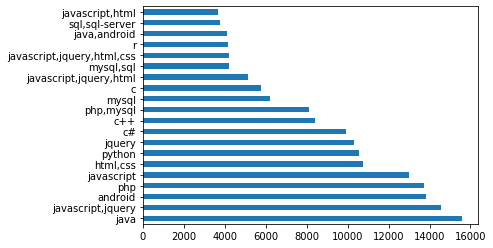

In [36]:
df_QAT.Tag.value_counts().head(20).plot.barh()

In [ ]:
#Reading Values for User data

In [37]:
df_U=pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv",encoding="latin-1")
df_U.head()

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [ ]:
#Info about User data

In [38]:
df_U.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990480 entries, 0 to 1990479
Data columns (total 9 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Unnamed: 0        int64 
 1   id                int64 
 2   display_name      object
 3   creation_date     object
 4   last_access_date  object
 5   reputation        int64 
 6   up_votes          int64 
 7   down_votes        int64 
 8   views             int64 
dtypes: int64(6), object(3)
memory usage: 136.7+ MB


In [ ]:
#Shape about User data

In [39]:
df_U.shape

(1990480, 9)

In [ ]:
#Checking for null values

In [40]:
df_U.isnull().sum()

Unnamed: 0            0
id                    0
display_name        136
creation_date         0
last_access_date      0
reputation            0
up_votes              0
down_votes            0
views                 0
dtype: int64

In [ ]:
#Dropping unneceesary column form User dataframe

In [41]:
df_U.drop(("Unnamed: 0") ,axis =1, inplace =True)

In [ ]:
#Prinitng values for Users

In [42]:
df_U.head()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [ ]:
#Converting datatypes as required

In [43]:
df_U["id"] =df_U["id"].astype('int64').astype('str')


In [44]:
## **************Analysis of Data starts with different analysis and all three objective asked in the case study below*************

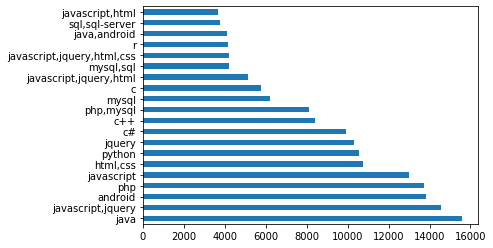

In [45]:

Top20_groupedtags = df_QAT['Tag'].value_counts().head(20)
Top20_groupedtags.plot.barh(x="tag",y="count", rot=0)

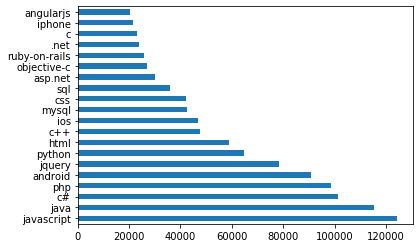

In [46]:
Top20_tags = df_T["Tag"].value_counts().head(20)

Top20_tags.plot.barh(x="tag",y="count", rot=0)

In [47]:
#Top 5 Questions

In [48]:
top_Questions=list(zip(df_Q["Id"],df_Q["Score"],df_Q["Title"]))

top_Questions.sort(key = lambda x: x[1],reverse =True)

for id, score, title in top_Questions[:5]:
  print("Question Id:",id)
  print("Score:",score)
  print("Question Title\t:",title,'\n')

Question Id: 348170
Score: 5190
Question Title	: How to undo 'git add' before commit? 

Question Id: 40480
Score: 3613
Question Title	: Is Java "pass-by-reference" or "pass-by-value"? 

Question Id: 406230
Score: 2537
Question Title	: Regular expression to match line that doesn't contain a word? 

Question Id: 520650
Score: 2399
Question Title	: Make an existing Git branch track a remote branch? 

Question Id: 2669690
Score: 2363
Question Title	: Why does Google prepend while(1); to their JSON responses? 



In [49]:
#Top 5 Answers

In [50]:
top_Answers=list(zip(df_A["Id"],df_A["Score"],df_A["OwnerUserId"]))

top_Answers.sort(key = lambda x: x[1],reverse =True)

for id, score, owneruserid in top_Answers[:5]:
  print("Answer Id:",id)
  print("Score:",score)
  print("OwnerUserId \t:",owneruserid,'\n')

Answer Id: 348234
Score: 5718
OwnerUserId 	: 39933.0 

Answer Id: 406408
Score: 3637
OwnerUserId 	: 50476.0 

Answer Id: 4366748
Score: 3549
OwnerUserId 	: 227665.0 

Answer Id: 40523
Score: 3038
OwnerUserId 	: 4192.0 

Answer Id: 16957078
Score: 2988
OwnerUserId 	: 2231815.0 



In [ ]:
##Merging QAT dataframe created above with users to get final table

In [51]:
df_QATU =pd.merge(df_QAT,df_U,how ="right", left_on="Id_x",right_on ="id")
df_QATU.head()

,Id_x,OwnerUserId_x,CreationDate_x,ClosedDate,Score_x,Title,Id_y,OwnerUserId_y,CreationDate_y,ParentId,...,Id,Tag,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,80,26,2008-08-01T13:57:07Z,NaN,26.0,SQLStatement.execute() - multiple queries in o...,124,26,2008-08-01T16:09:47Z,80,...,80,"flex,actionscript-3,air",80,alumb,2008-08-01 16:11:11.427 UTC,2019-08-30 16:34:24.06 UTC,3241,145,7,1006
1,80,26,2008-08-01T13:57:07Z,NaN,26.0,SQLStatement.execute() - multiple queries in o...,10008,1109,2008-08-13T16:09:09Z,80,...,80,"flex,actionscript-3,air",80,alumb,2008-08-01 16:11:11.427 UTC,2019-08-30 16:34:24.06 UTC,3241,145,7,1006
2,80,26,2008-08-01T13:57:07Z,NaN,26.0,SQLStatement.execute() - multiple queries in o...,3770976,364174,2010-09-22T15:37:30Z,80,...,80,"flex,actionscript-3,air",80,alumb,2008-08-01 16:11:11.427 UTC,2019-08-30 16:34:24.06 UTC,3241,145,7,1006
3,120,83,2008-08-01T15:50:08Z,NaN,21.0,ASP.NET Site Maps,124363,12734,2008-09-23T22:41:11Z,120,...,120,"sql,asp.net,sitemap",120,hitec,2008-08-02 06:23:02.97 UTC,2019-08-21 04:52:50.33 UTC,970,142,0,285
4,120,83,2008-08-01T15:50:08Z,NaN,21.0,ASP.NET Site Maps,124363,12734,2008-09-23T22:41:11Z,120,...,120,"sql,asp.net,sitemap",120,hitec,2008-08-02 06:23:02.97 UTC,2019-08-21 04:52:50.33 UTC,970,142,0,285


In [ ]:
#Printing values for QATU dataframe

In [52]:
inp1 = df_QATU
inp1.head()

,Id_x,OwnerUserId_x,CreationDate_x,ClosedDate,Score_x,Title,Id_y,OwnerUserId_y,CreationDate_y,ParentId,...,Id,Tag,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,80,26,2008-08-01T13:57:07Z,NaN,26.0,SQLStatement.execute() - multiple queries in o...,124,26,2008-08-01T16:09:47Z,80,...,80,"flex,actionscript-3,air",80,alumb,2008-08-01 16:11:11.427 UTC,2019-08-30 16:34:24.06 UTC,3241,145,7,1006
1,80,26,2008-08-01T13:57:07Z,NaN,26.0,SQLStatement.execute() - multiple queries in o...,10008,1109,2008-08-13T16:09:09Z,80,...,80,"flex,actionscript-3,air",80,alumb,2008-08-01 16:11:11.427 UTC,2019-08-30 16:34:24.06 UTC,3241,145,7,1006
2,80,26,2008-08-01T13:57:07Z,NaN,26.0,SQLStatement.execute() - multiple queries in o...,3770976,364174,2010-09-22T15:37:30Z,80,...,80,"flex,actionscript-3,air",80,alumb,2008-08-01 16:11:11.427 UTC,2019-08-30 16:34:24.06 UTC,3241,145,7,1006
3,120,83,2008-08-01T15:50:08Z,NaN,21.0,ASP.NET Site Maps,124363,12734,2008-09-23T22:41:11Z,120,...,120,"sql,asp.net,sitemap",120,hitec,2008-08-02 06:23:02.97 UTC,2019-08-21 04:52:50.33 UTC,970,142,0,285
4,120,83,2008-08-01T15:50:08Z,NaN,21.0,ASP.NET Site Maps,124363,12734,2008-09-23T22:41:11Z,120,...,120,"sql,asp.net,sitemap",120,hitec,2008-08-02 06:23:02.97 UTC,2019-08-21 04:52:50.33 UTC,970,142,0,285


In [ ]:
#Info about inp1 i.e. QATU dataframe 

In [104]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2081447 entries, 0 to 2081446
Data columns (total 22 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Id_x              object        
 1   OwnerUserId_x     object        
 2   CreationDate_x    datetime64[ns]
 3   ClosedDate        object        
 4   Score_x           float64       
 5   Title             object        
 6   Id_y              object        
 7   OwnerUserId_y     object        
 8   CreationDate_y    datetime64[ns]
 9   ParentId          object        
 10  Score_y           float64       
 11  Id                object        
 12  Tag               object        
 13  id                object        
 14  display_name      object        
 15  creation_date     object        
 16  last_access_date  object        
 17  reputation        int64         
 18  up_votes          int64         
 19  down_votes        int64         
 20  views             int64         
 21  time_dif

### Preparation for Case study Objective 2 [Getting Creation date for both question and answer to give us insight on time difference and finally will tell us expected for datascience tags]

In [54]:
inp1["CreationDate_x"]=inp1["CreationDate_x"].apply(lambda x: str(x).split("T")[0])

In [55]:
inp1["CreationDate_y"]=inp1["CreationDate_y"].apply(lambda x: str(x).split("T")[0])

In [56]:
inp1["CreationDate_x"] = pd.to_datetime(inp1["CreationDate_x"])

inp1["CreationDate_y"] = pd.to_datetime(inp1["CreationDate_y"])

In [57]:
inp1["time_diff_x_days"] = inp1["CreationDate_y"] - inp1["CreationDate_x"]


In [58]:
inp1.head()

,Id_x,OwnerUserId_x,CreationDate_x,ClosedDate,Score_x,Title,Id_y,OwnerUserId_y,CreationDate_y,ParentId,...,Tag,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views,time_diff_x_days
0,80,26,2008-08-01,NaN,26.0,SQLStatement.execute() - multiple queries in o...,124,26,2008-08-01,80,...,"flex,actionscript-3,air",80,alumb,2008-08-01 16:11:11.427 UTC,2019-08-30 16:34:24.06 UTC,3241,145,7,1006,0 days
1,80,26,2008-08-01,NaN,26.0,SQLStatement.execute() - multiple queries in o...,10008,1109,2008-08-13,80,...,"flex,actionscript-3,air",80,alumb,2008-08-01 16:11:11.427 UTC,2019-08-30 16:34:24.06 UTC,3241,145,7,1006,12 days
2,80,26,2008-08-01,NaN,26.0,SQLStatement.execute() - multiple queries in o...,3770976,364174,2010-09-22,80,...,"flex,actionscript-3,air",80,alumb,2008-08-01 16:11:11.427 UTC,2019-08-30 16:34:24.06 UTC,3241,145,7,1006,782 days
3,120,83,2008-08-01,NaN,21.0,ASP.NET Site Maps,124363,12734,2008-09-23,120,...,"sql,asp.net,sitemap",120,hitec,2008-08-02 06:23:02.97 UTC,2019-08-21 04:52:50.33 UTC,970,142,0,285,53 days
4,120,83,2008-08-01,NaN,21.0,ASP.NET Site Maps,124363,12734,2008-09-23,120,...,"sql,asp.net,sitemap",120,hitec,2008-08-02 06:23:02.97 UTC,2019-08-21 04:52:50.33 UTC,970,142,0,285,53 days


In [59]:
inp1["time_diff_x_days"] = inp1["time_diff_x_days"].apply(lambda x: str(x).split(" ")[0])

In [60]:
inp1.head()

,Id_x,OwnerUserId_x,CreationDate_x,ClosedDate,Score_x,Title,Id_y,OwnerUserId_y,CreationDate_y,ParentId,...,Tag,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views,time_diff_x_days
0,80,26,2008-08-01,NaN,26.0,SQLStatement.execute() - multiple queries in o...,124,26,2008-08-01,80,...,"flex,actionscript-3,air",80,alumb,2008-08-01 16:11:11.427 UTC,2019-08-30 16:34:24.06 UTC,3241,145,7,1006,0
1,80,26,2008-08-01,NaN,26.0,SQLStatement.execute() - multiple queries in o...,10008,1109,2008-08-13,80,...,"flex,actionscript-3,air",80,alumb,2008-08-01 16:11:11.427 UTC,2019-08-30 16:34:24.06 UTC,3241,145,7,1006,12
2,80,26,2008-08-01,NaN,26.0,SQLStatement.execute() - multiple queries in o...,3770976,364174,2010-09-22,80,...,"flex,actionscript-3,air",80,alumb,2008-08-01 16:11:11.427 UTC,2019-08-30 16:34:24.06 UTC,3241,145,7,1006,782
3,120,83,2008-08-01,NaN,21.0,ASP.NET Site Maps,124363,12734,2008-09-23,120,...,"sql,asp.net,sitemap",120,hitec,2008-08-02 06:23:02.97 UTC,2019-08-21 04:52:50.33 UTC,970,142,0,285,53
4,120,83,2008-08-01,NaN,21.0,ASP.NET Site Maps,124363,12734,2008-09-23,120,...,"sql,asp.net,sitemap",120,hitec,2008-08-02 06:23:02.97 UTC,2019-08-21 04:52:50.33 UTC,970,142,0,285,53


In [61]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2081447 entries, 0 to 2081446
Data columns (total 22 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Id_x              object        
 1   OwnerUserId_x     object        
 2   CreationDate_x    datetime64[ns]
 3   ClosedDate        object        
 4   Score_x           float64       
 5   Title             object        
 6   Id_y              object        
 7   OwnerUserId_y     object        
 8   CreationDate_y    datetime64[ns]
 9   ParentId          object        
 10  Score_y           float64       
 11  Id                object        
 12  Tag               object        
 13  id                object        
 14  display_name      object        
 15  creation_date     object        
 16  last_access_date  object        
 17  reputation        int64         
 18  up_votes          int64         
 19  down_votes        int64         
 20  views             int64         
 21  time_dif

### Case Study Objective 2 : How much expected time to reosolve or get answer for a question with Data science tags ['python', 'r', 'matlab', 'sas', 'excel', 'sql'] 

In [64]:
for i in ['python', 'r', 'matlab', 'sas', 'excel', 'sql']:
  print("Time to resolve datascience questions having ",i,inp1[inp1.Tag == i].time_diff_x_days.median(),"days")

Time to resolve datascience questions having  python 0.0 days
Time to resolve datascience questions having  r 0.0 days
Time to resolve datascience questions having  matlab 3.0 days
Time to resolve datascience questions having  sas nan days
Time to resolve datascience questions having  excel 0.0 days
Time to resolve datascience questions having  sql 0.0 days


In [65]:
#Famous Usernames [Some Analysis for Famous Users]

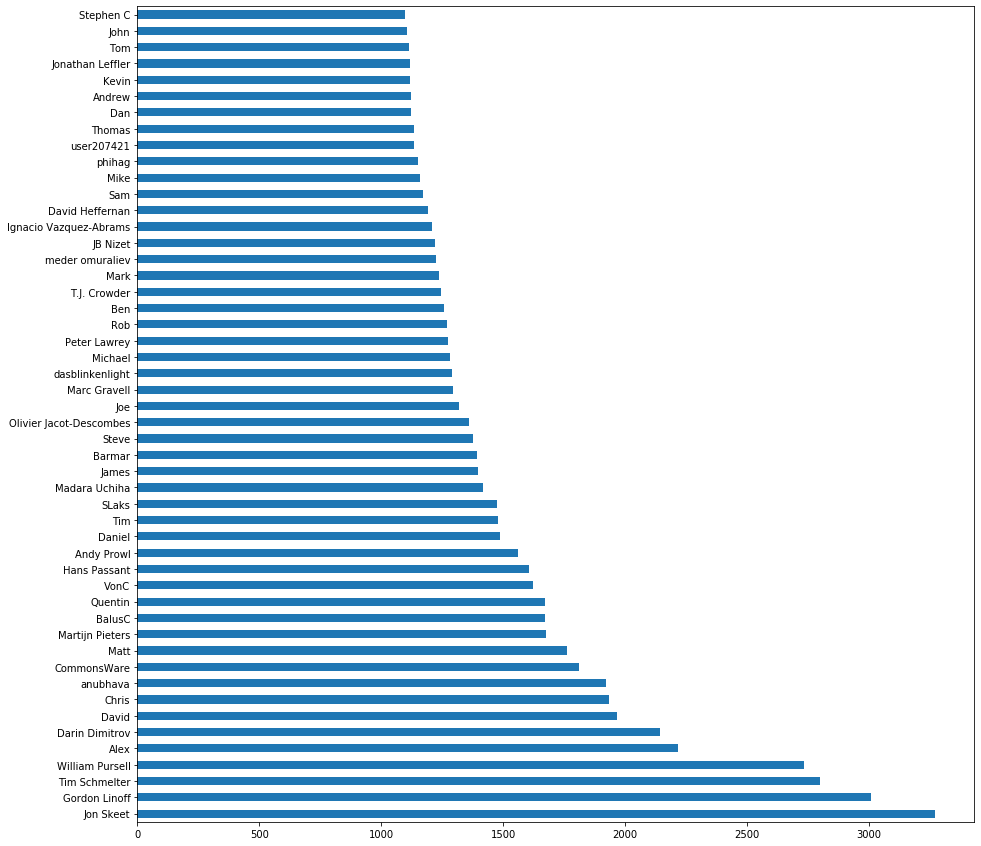

In [66]:
plt.figure(figsize =[15,15])
inp1["display_name"].value_counts().head(50).plot.barh()
plt.show()

In [67]:
#Display Name with Views

<Figure size 1440x1440 with 0 Axes>

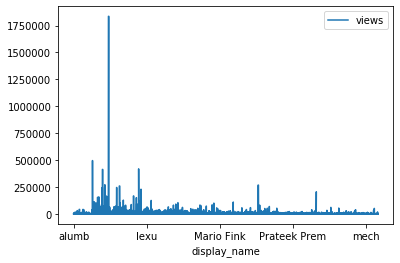

In [68]:
plt.figure(figsize =[20,20])

inp1.plot.line(x="display_name", y = "views")

In [69]:
#Userid with reputation

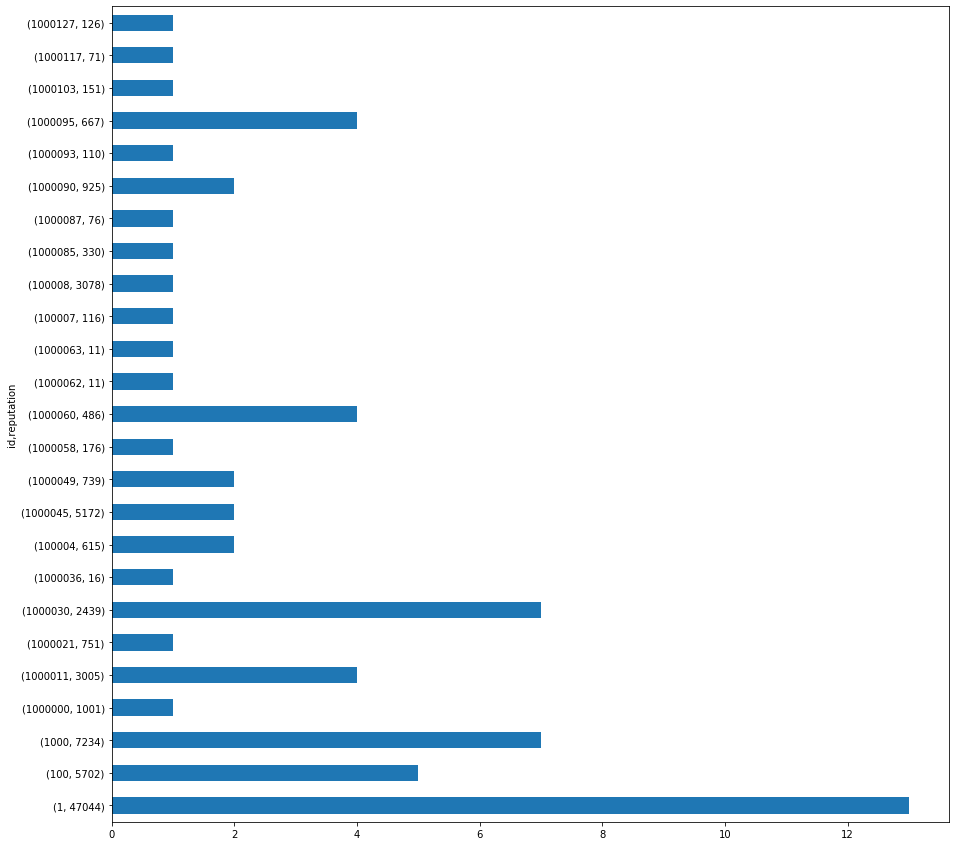

In [70]:
plt.figure(figsize =[15,15])

df_U.groupby(["id"]).reputation.value_counts().head(25).plot.barh()

In [71]:
#WordCloud for Tags [This is working in google colab, not sure why not importing the same libararies in local jupyter notebook]

In [72]:
Tags = df_QATU[df_QATU["Tag"].notnull()]["Tag"].str.replace(" ","")
wc = WordCloud(background_color="black",colormap="rainbow",scale=5).generate(" ".join(Tags))
plt.figure(figsize=(14,10))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Tags")
plt.show()

NameError: name 'WordCloud' is not defined

In [77]:
#25 most Popular Tags

In [78]:
tags = list(df_T['Tag'].unique())
all_tags = []
for tag in df_T['Tag']:
    all_tags += tag.split(',')

In [79]:
count_tags = Counter(all_tags)
tags = pd.DataFrame([list(count_tags.keys()), list(count_tags.values())])
tags = tags.transpose()
tags.columns = ['tag', 'count']
tags = tags.sort_values(by='count', ascending=False)

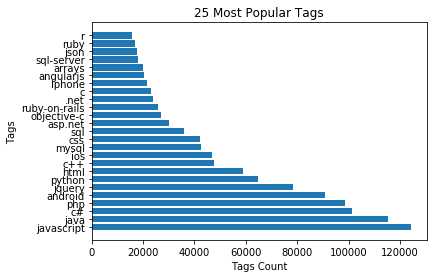

In [80]:
plt.barh(list(tags['tag'])[:25], list(tags['count'])[:25])
plt.ylabel('Tags')
plt.xlabel('Tags Count')
plt.title('25 Most Popular Tags')
plt.show()

In [81]:
#Popular Tags in data science ['python', 'r', 'matlab', 'sas', 'excel', 'sql']

In [82]:
data_science_tags = ['python', 'r', 'matlab', 'sas', 'excel', 'sql']
x = []
y = []
for tag in data_science_tags:
    index = list(tags['tag']).index(tag)
    x.append(tag)
    y.append(list(tags['count'])[index])

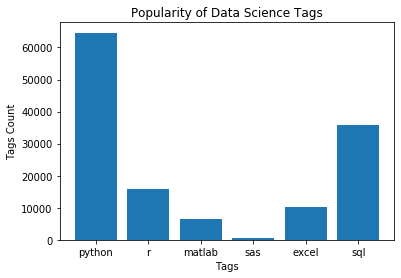

In [83]:
plt.bar(x, y)
plt.ylabel('Tags Count')
plt.xlabel('Tags')
plt.title('Popularity of Data Science Tags')
plt.show()

### Objective 1: For Datascience Tags ['python', 'r', 'matlab', 'sas', 'excel', 'sql'] relevant user Id to answer the questions

In [86]:
for i in ['python', 'r', 'matlab', 'sas', 'excel', 'sql']:
  print("OwnerUserId which can be contacted for ",i,inp1[inp1.Tag == i].OwnerUserId_y.unique())

OwnerUserId which can be contacted for  python ['46523' '773112' '20713' '2696' '18936' '10661' '81440' '893' '22364'
 '6372' '15154' '21886' '3002' '64045' '165216' '34813' '12855' '222758'
 '187103' '43089' '745' '117092' '95810' '53850' '121112' '9822' '124852'
 '148870' '6456' '223632' '44309' '131527' '101258' '15369' '1977903'
 '61974' '206417' '19966' '2237026' '8206' '182954' '2082964' '20862'
 '91962' '257465' '218196' '158897' '587021' '141555' '95592' '34088'
 '353790' '322806' '180239' '444397' '66229' '42346' '444036' '229602'
 '126214' '233096' '95852' '468327' '521034' '592851' '153133' '454229'
 '71522' '770038' '868488' '42973']
OwnerUserId which can be contacted for  r ['428790' '176923' '430909' '415635' '614057' '509782' '1877267']
OwnerUserId which can be contacted for  matlab ['1714410' '232610' '134830' '163080' '607120' '46439' '14946']
OwnerUserId which can be contacted for  sas []
OwnerUserId which can be contacted for  excel ['4' '25990' '25675' '11683']
Owne

### Objective 3 : For Datascience Tags ['python', 'r', 'matlab', 'sas', 'excel', 'sql'] relevant user anwers already existing can be provided to  question as suggestion till the time relevant user answers the questions in Objective 1

In [107]:
obj3 =[]

for i in ['python', 'r', 'matlab', 'sas', 'excel', 'sql']:
  print("Answers which can be provided as suggestions to the users for ",i,inp1[inp1.Tag == i].Id_y.unique())

Answers which can be provided as suggestions to the users for  python ['482423' '6385389' '668582' '722650' '722653' '722696' '724665' '823057'
 '823072' '823077' '823079' '1030083' '1030085' '1030147' '1448834'
 '1448842' '1448844' '18036492' '1544370' '1544398' '1544584' '1544637'
 '1544682' '1594175' '1857835' '1857906' '1954701' '1954739' '1954796'
 '1954848' '1964756' '1964764' '1964831' '2024674' '2396361' '2396377'
 '2396447' '2566853' '2566885' '2570707' '2570709' '2570801' '2571112'
 '28082941' '2574090' '2574230' '31425911' '2576337' '2576341' '2576420'
 '3003411' '3003461' '3005565' '3008252' '3159130' '3159152' '30928240'
 '3391956' '3391957' '3685022' '3685050' '3685083' '3685100' '3685148'
 '3951850' '3984264' '3984312' '3984333' '3984359' '4562621' '4844974'
 '5827019' '5827020' '5827027' '5827046' '5827078' '5827090' '5890152'
 '6879492' '6879807' '6881810']
Answers which can be provided as suggestions to the users for  r ['3661813' '4369796' '5422225' '5422230' '542223

In [ ]:
#Stroing the results into Amazon RDS Database Instance

In [ ]:
!pip3 install mysql-connector --user

In [ ]:
import mysql.connector

dbc = mysql.connector.connect(
host = "database-1.ckmft6y0jvbb.us-east-1.rds.amazonaws.com",
    user = "admin",
    passwd ="vipluv@04",
    port ="3306"
    db = "database-1"
)

In [ ]:
cur = dbc.cursor()

In [ ]:
##Create table to put the values

In [ ]:
cur.execute("CREATE TABLE stackoverflow (Obj1 VARCHAR(255), Obj2 VARCHAR(255), Obj3 VARCHAR(255))")

In [ ]:
##Inserting values into table

In [ ]:
sql = "INSERT INTO stackoverflow(obj1,obj2,obj3) VALUES (%s,%s,%s)"

val = (ans1, ans2, ans3)

cur.execute(sql, val)

In [ ]:
##Selecting Reading data from table

In [ ]:
cur.execute("SELECT obj1,obj2,obj3 FROM stackoverflow")

result = cur.fetchall

In [ ]:
##Printing the result

In [ ]:
print(result)